In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [4]:
# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names

In [6]:
# Split the dataset into train, validation, and test sets
train_ds = dataset.take(54)
val_ds = dataset.skip(54).take(6)
test_ds = dataset.skip(60)

In [7]:
# Data augmentation and preprocessing
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

In [8]:
# ANN Model
ann_model = models.Sequential([
    resize_and_rescale,
    layers.Flatten(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [9]:
# Compile ANN Model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train ANN Model
ann_history = ann_model.fit(train_ds, validation_data=val_ds, epochs=50, verbose=1)

Epoch 1/50
54/54 [==============================] - 27s 474ms/step - loss: 18.6103 - accuracy: 0.5955 - val_loss: 3.5883 - val_accuracy: 0.2656
Epoch 2/50
54/54 [==============================] - 25s 465ms/step - loss: 3.5984 - accuracy: 0.6314 - val_loss: 0.5896 - val_accuracy: 0.8490
Epoch 3/50
54/54 [==============================] - 25s 460ms/step - loss: 1.7996 - accuracy: 0.6869 - val_loss: 2.7564 - val_accuracy: 0.4896
Epoch 4/50
54/54 [==============================] - 25s 461ms/step - loss: 1.3981 - accuracy: 0.7118 - val_loss: 0.5111 - val_accuracy: 0.8125
Epoch 5/50
54/54 [==============================] - 25s 462ms/step - loss: 0.8115 - accuracy: 0.7708 - val_loss: 0.8459 - val_accuracy: 0.7292
Epoch 6/50
54/54 [==============================] - 25s 463ms/step - loss: 1.0671 - accuracy: 0.7569 - val_loss: 1.1967 - val_accuracy: 0.7083
Epoch 7/50
54/54 [==============================] - 25s 466ms/step - loss: 0.7901 - accuracy: 0.7535 - val_loss: 0.4465 - val_accuracy: 0.817

In [11]:
ann_evaluation = ann_model.evaluate(test_ds)
print("ANN Evaluation:")
print("Loss:", ann_evaluation[0])
print("Accuracy:", ann_evaluation[1])

8/8 [==============================] - 4s 80ms/step - loss: 0.5357 - accuracy: 0.8060
ANN Evaluation:
Loss: 0.5356901288032532
Accuracy: 0.806034505367279


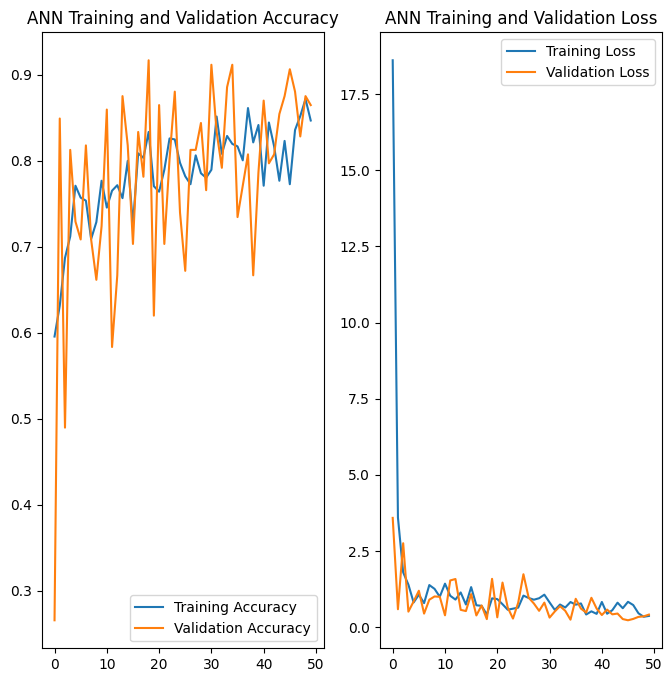

In [12]:
# Visualize ANN Training History
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(range(50), ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ANN Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), ann_history.history['loss'], label='Training Loss')
plt.plot(range(50), ann_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('ANN Training and Validation Loss')
plt.show()


first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 928ms/step
predicted label: Potato___Early_blight


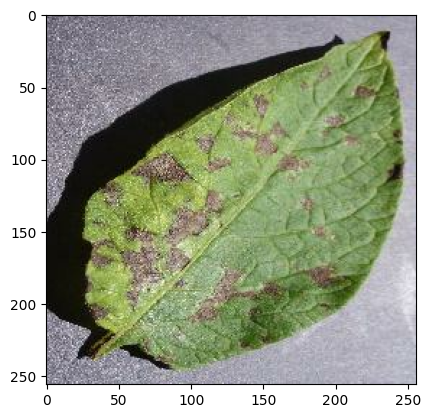

In [14]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = ann_model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [15]:
def predict(ann_model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = ann_model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 101ms/step


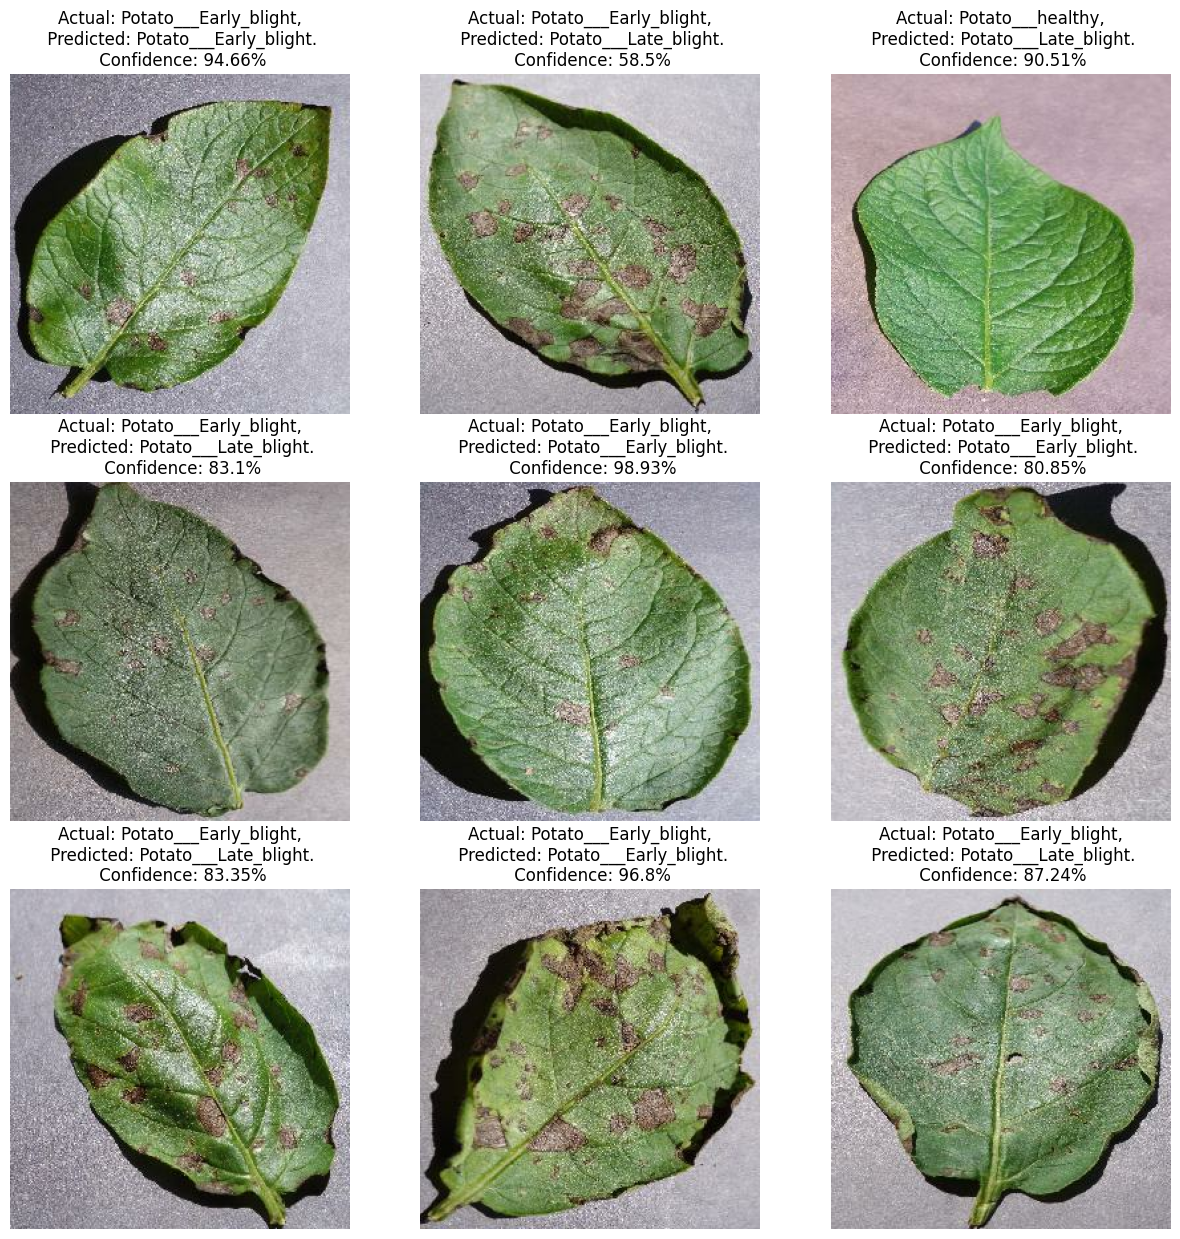

In [16]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(ann_model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")